# Example with HPLF data

## Modules

In [1]:
# Necessary modules
import numpy as np 
import matplotlib.pyplot as plt
import os
from HPLF_outputs import *
from HPLF_visar import *
from Velocity_analysis import *
import matplotlib
import glob
matplotlib.warnings.filterwarnings("ignore")
%load_ext autoreload
%matplotlib widget

## Path to data and parameters

Path to reference and shot data directories

In [2]:
ref_nb = '0205'  # if no ref write None
shot_nb = '0206' # string with 4 digits

path_base = f'{os.getcwd()}/HPLF_data/'

# ref folder
if ref_nb is not None:
    for dir in glob.glob(path_base + f"/RAW_DATA/run_{ref_nb}*/run_{ref_nb}*_run_{ref_nb}*"):
        print(dir)
        path_dir_ref = dir

# shot folder
for dir in glob.glob(path_base + f"/RAW_DATA/run_{shot_nb}*/run_{shot_nb}*_run_{shot_nb}*"):
    print(dir)
    path_dir_shot = dir

c:\Users\jean1509\Documents\Projects\VISAR_proc\notebooks/HPLF_data//RAW_DATA\run_0205_streak_ref_2024_07_16_17_33_07\run_0205_streak_ref_2024_07_16_17_33_07_run_0205_streak_ref_2024_07_16_17_33_07
c:\Users\jean1509\Documents\Projects\VISAR_proc\notebooks/HPLF_data//RAW_DATA\run_0206_laser_only_2024_07_16_17_35_30\run_0206_laser_only_2024_07_16_17_35_30_run_0206_laser_only_2024_07_16_17_35_30


Streak and VISAR parameters

In [3]:
# VISAR1 parameters
S1_param = {
    "name":'S1',
    "window":'20ns',
    "DG_chA":None,
    "gain":None,
    "t0_px":536,
    "delay_to_drive":0,
    "pos0_px":672,
    "fov":480,
    "counts_bkg":120,
    "tX":None,
    "sizeX":None
    }

# VISAR2 parameters
S2_param = {
    "name":'S2',
    "window":'20ns',
    "DG_chA":None,
    "gain":None,
    "t0_px":560,
    "delay_to_drive":0,
    "pos0_px":704,
    "fov":480,
    "counts_bkg":115,
    "tX":None,
    "sizeX":None
    }

# SOP parameters
S3_param = {
    "name":'S3',
    "window":'20ns',
    "DG_chA":None,
    "gain":None,
    "t0_px":564,
    "delay_to_drive":0,
    "pos0_px":672,
    "fov":590,
    "counts_bkg":0,
    "tX":None,
    "sizeX":None
    }

## Shot summary

Definition: Al1/PN41/Al1/PN41
Energy of target: 52.092139
Phase plate: None


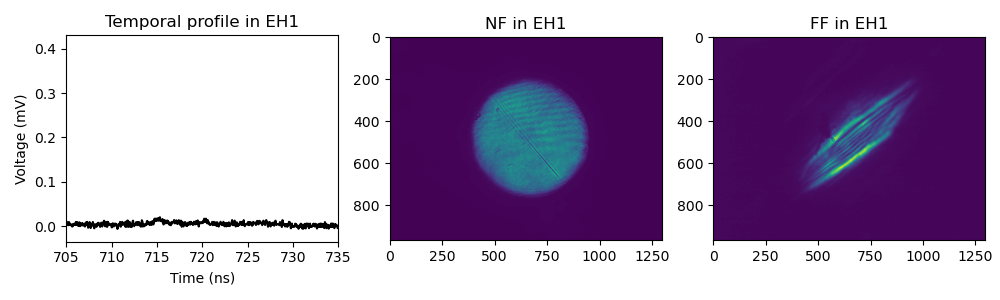

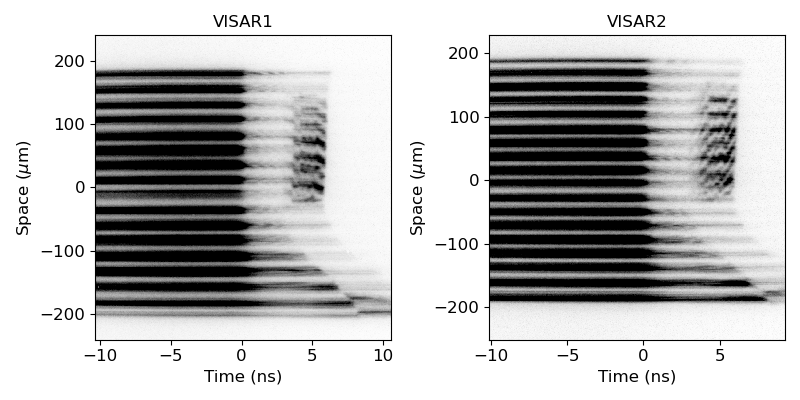

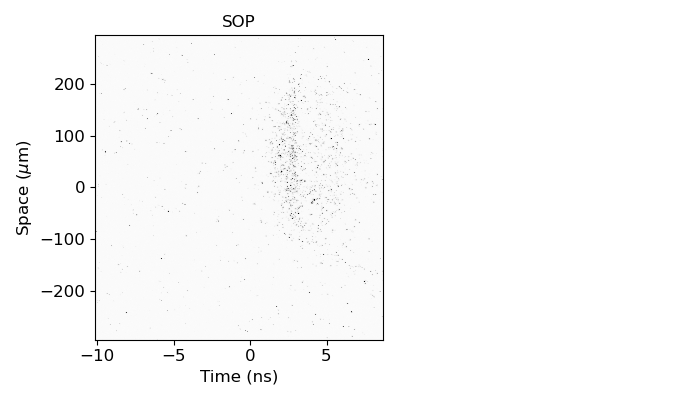

In [4]:
%matplotlib widget

# Loading data from ref and shot folders
if ref_nb is not None:
    ref_outputs = HPLF_outputs(path_dir_ref, SOP=True)
    ref_outputs.read_metadata()
shot_outputs = HPLF_outputs(path_dir_shot, I0=True, SOP=True)
shot_outputs.read_metadata()
# Some information about shot
print(f'Definition: {shot_outputs.definition}')
print(f'Energy of target: {shot_outputs.energy_eh1}')
print(f'Phase plate: {shot_outputs.phase_plate}')

# Plot drive profile
shot_outputs.plot_drive_profile_eh1(delay_oscillo=705, win_oscillo=30)

# # Rotate or flip images if needed
# ref_outputs.VISAR1.rotate_im(0)
# shot_outputs.VISAR1.rotate_im(0)
# ref_outputs.VISAR2.rotate_im(0)
# shot_outputs.VISAR2.rotate_im(0)
ref_outputs.SOP.flipspace_im() # HPLF SOP is flipped compared to VISARs
shot_outputs.SOP.flipspace_im()

# Apply acquisition parameters to streak images
ref_outputs.VISAR1.apply_param_dict(S1_param)
ref_outputs.VISAR2.apply_param_dict(S2_param)
shot_outputs.VISAR1.apply_param_dict(S1_param)
shot_outputs.VISAR2.apply_param_dict(S2_param)
shot_outputs.SOP.apply_param_dict(S3_param)

# Plot VISAR images
# if ref_nb is not None:
#     ref_outputs.plot_VISAR_images(calibrated=True, cmap='binary', fontsize=12)
shot_outputs.plot_VISAR_images(calibrated=True, cmap='binary', fontsize=12)
shot_outputs.plot_SOP_image(calibrated=True, cmap='binary', fontsize=12)

# # shot_outputs.VISAR_images.savefig(path_base + os.sep + f"PROCESSED_DATA/run{shot_nb}_VISAR_images.pdf")
# # 
# # # Plot XAS if any
# # shot_outputs.read_XAS(nb_frame=99, shot_frame=99, calib_coefs=np.array([1.2e-5, 0.378, 8293.86]))
# # shot_outputs.normalize_XAS(Ea_range=[8290, 8320], Eb_range=[8610, 8650])
# # shot_outputs.plot_XAS(xlim=(8280, 8700), ylim1=(0, 66000), ylim2=(-0.1, 1.5))

SOP integration

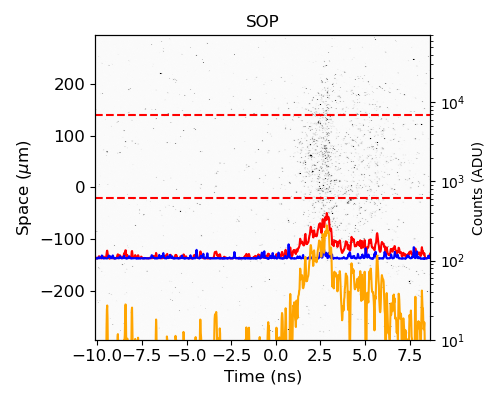

In [5]:
fig = plt.figure(figsize=(5, 4))
ymin = -20
ymax = 140
# SOP
fontsize=12
cmap = 'binary'
ax1 = fig.add_subplot(111)
# Set tick font size
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(fontsize)
ax1.set_title(r'SOP')
ax1.set_xlabel(r'Time (ns)', fontsize=fontsize)
ax1.set_ylabel(r'Space ($\mu$m)', fontsize=fontsize)
grid_tSOP, grid_sSOP = np.meshgrid(shot_outputs.SOP.time, shot_outputs.SOP.space)
ax1.pcolormesh(grid_tSOP, grid_sSOP, shot_outputs.SOP.im.transpose(), vmax=np.max(shot_outputs.SOP.im)/3., cmap=cmap, rasterized=True) #
if shot_outputs.SOP.tX!=None:
    ax1.plot([shot_outputs.SOP.tX, shot_outputs.SOP.tX], [-shot_outputs.SOP.sizeX/2,shot_outputs.SOP.sizeX/2], 'r-')
ax1.axhline(y=ymax, ls='--', color='r')
ax1.axhline(y=ymin, ls='--', color='r')
ax2 = ax1.twinx()
ax2.set_ylabel('Counts (ADU)')
ax2.set_ylim(10, 70000)
Isop = np.average(shot_outputs.SOP.im.transpose()[(shot_outputs.SOP.space>=ymin)&(shot_outputs.SOP.space<=ymax)], axis=0)
Isop_shotbkg = np.average(shot_outputs.SOP.im.transpose()[(shot_outputs.SOP.space>=230)|(shot_outputs.SOP.space<=-250)], axis=0)
Isop_bkg = 300
ax2.semilogy(shot_outputs.SOP.time,  Isop, 'r-')
ax2.semilogy(shot_outputs.SOP.time,  Isop_shotbkg, 'b-')
ax2.semilogy(shot_outputs.SOP.time, Isop-Isop_shotbkg , '-', color='orange')
fig.tight_layout()
plt.show()

## Exports

Export XAS

In [6]:
# path_out = path_base + os.sep + f'PROCESSED_DATA/run_{shot_nb}_XAS_norm.dat'
# shot_outputs.export_XAS(path_out)

Export pulse shape for hydro simulations

In [7]:
# # For multi -- normalized so that max is 1
# y = shot_outputs.tektro64_profile
# trace_length = 20 # in ns
# dt_oscillo = (shot_outputs.tektro64_t[1]-shot_outputs.tektro64_t[0])*1e9 # in ns
# idx_start_pulse = int(713.8/dt_oscillo) #int(14285)
# idx_end_pulse = int(idx_start_pulse + trace_length/dt_oscillo)
# t_oscillo = np.linspace(0, trace_length+dt_oscillo, int(trace_length/dt_oscillo))
# y_bkg = np.average(y[0: idx_start_pulse - 300])
# y = (y-y_bkg)/np.max((y-y_bkg))
# y = y[idx_start_pulse:idx_end_pulse]
# y[0] = 0
# y[y<0] = 0
# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(111)
# # ax.plot(y, 'k-')
# ax.plot(t_oscillo, y, 'k-')
# fig.tight_layout()
# plt.show()
# with open(path_base + os.sep + f'PROCESSED_DATA/run{shot_nb}_pulse.txt', 'w') as fi:    
#     # fi.write('0.0\t0.0\n')
#     for ii in range(0, len(t_oscillo)):
#         # if t_oscillo[ii]>=0:
#         fi.write(f'{t_oscillo[ii]}\t{y[ii]}\n')

# # For Esther -- normalized so that max is 1
# y = shot_outputs.tektro64_profile
# trace_length = 20 # in ns
# dt_oscillo = (shot_outputs.tektro64_t[1]-shot_outputs.tektro64_t[0])*1e9 # in ns
# idx_start_pulse = int(713.8/dt_oscillo) #int(14285)
# idx_end_pulse = int(idx_start_pulse + trace_length/dt_oscillo)
# t_oscillo = np.linspace(0, trace_length+dt_oscillo, int(trace_length/dt_oscillo))
# y_bkg = np.average(y[0: idx_start_pulse - 300])
# y = (y-y_bkg)/np.max((y-y_bkg))
# y = y[idx_start_pulse:idx_end_pulse]
# y[0] = 0
# y[y<0] = 0
# y[-1] = 0
# fig = plt.figure(figsize=(6,5))
# ax = fig.add_subplot(111)
# # ax.plot(y, 'k-')
# ax.plot(t_oscillo, y, 'k-')
# fig.tight_layout()
# plt.show()
# with open(path_base + os.sep + f'PROCESSED_DATA/run{shot_nb}_pulse_esther.txt', 'w') as fi:    
#     fi.write(f'{int(len(t_oscillo))}\n')
#     fi.write('temps (s ou u.a.)\tintensite (W/m2 ou u.a.)\n')
#     for ii in range(0, len(t_oscillo)):
#         # if t_oscillo[ii]>=0:
#         fi.write(f'{t_oscillo[ii]*1e-9:.5E}\t{y[ii]:.5E}\n')
#     fi.write('fin_de_fichier')

## VISAR analysis

Define ROIs for analysis

In [25]:
VISAR1_space_lim = (-20, 140)
VISAR1_time_lim = (-10, 9)
VISAR1_ROI = [VISAR1_space_lim, VISAR1_time_lim]
VISAR2_space_lim = (-20, 140)
VISAR2_time_lim = (-10, 9)
VISAR2_ROI = [VISAR2_space_lim, VISAR2_time_lim]

Calculated VPF: 6.1375213564587225 km/s


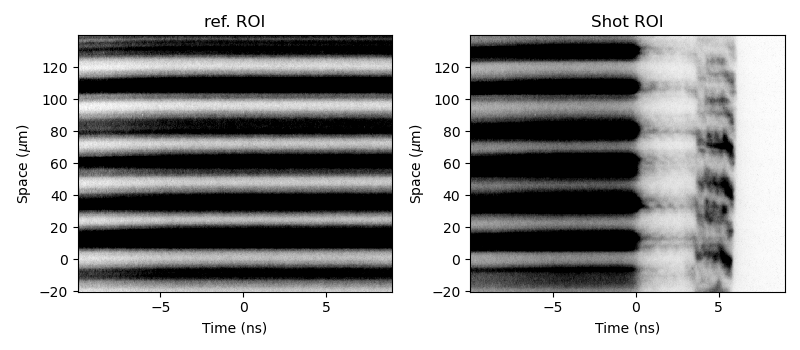

Calculated VPF: -2.4556201540788978 km/s


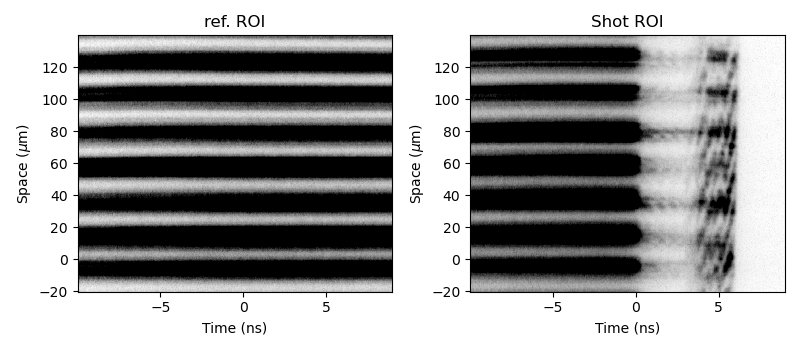

In [26]:
# VISAR1
VISAR1_process = HPLF_visar(ref_outputs.VISAR1, shot_outputs.VISAR1, wavelength=532e-9, dict_etalon={'refr_index':1.4607, 'dn_dl':-0.046309*1e6, 'thickness':8.03e-3, 'sign':1}, ROI=VISAR1_ROI)
VISAR1_process.apply_ROI()
# # VISAR2
VISAR2_process = HPLF_visar(ref_outputs.VISAR2, shot_outputs.VISAR2, wavelength=532e-9, dict_etalon={'refr_index':1.4607, 'dn_dl':-0.046309*1e6, 'thickness':20.07e-3, 'sign':-1}, ROI=VISAR2_ROI)
VISAR2_process.apply_ROI()

Optional deghost procedure

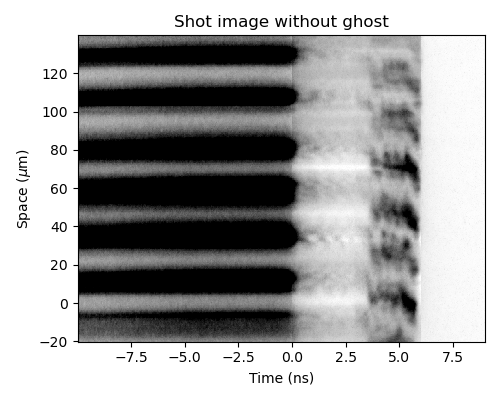

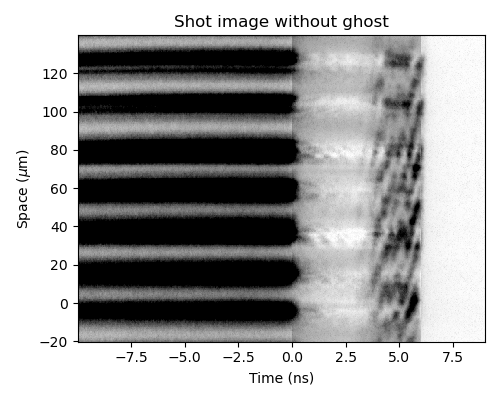

In [27]:
# defining ROI for deghost
VISAR1degh_space_lim = (-20, 140)
VISAR1degh_time_lim = (0, 6.0)
VISAR1degh_ROI = [VISAR1degh_space_lim, VISAR1degh_time_lim]
VISAR2degh_space_lim = (-20, 140)
VISAR2degh_time_lim = (0, 6.0)
VISAR2degh_ROI = [VISAR2degh_space_lim, VISAR2degh_time_lim]

# 2D FFT over selected region
VISAR1_process.deghost(deghROI=VISAR1degh_ROI, dqt=0.0, apply=True) #dqt should not be larger than 2e-3. 0 should work in most of cases. apply=True will modify the real image, so set it to False first and then to True once you are satisfied.
VISAR2_process.deghost(deghROI=VISAR2degh_ROI, dqt=0.0, apply=True)


Apply FT and choose filter band

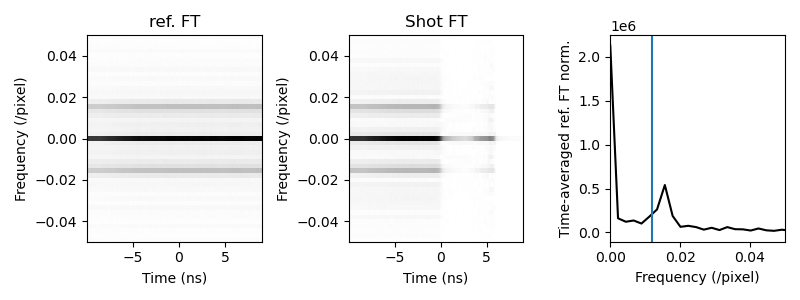

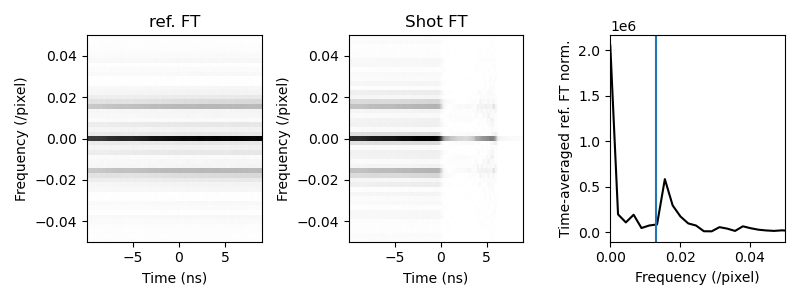

In [30]:
# VISAR1
VISAR1_filter_bounds = [0.0120, 0.5] #minimal value is the frequency below which you want to cut al the frequencies, the highest value depends on highest frequencies you want to consider
VISAR1_process.FFT_process(VISAR1_filter_bounds, sigma_blur=0)
# VISAR2
VISAR2_filter_bounds = [0.0130, 0.5]
VISAR2_process.FFT_process(VISAR2_filter_bounds, sigma_blur=0)

Apply bandpass filter, calculate BACKWARD FT and phase maps

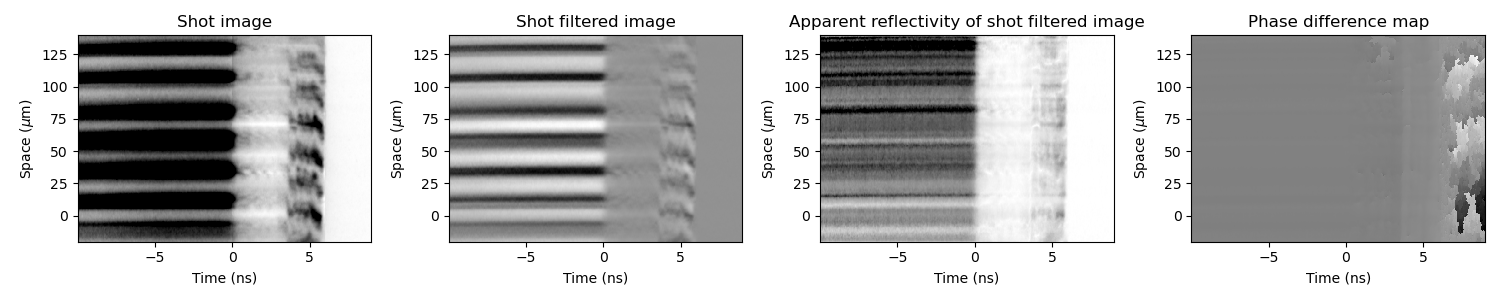

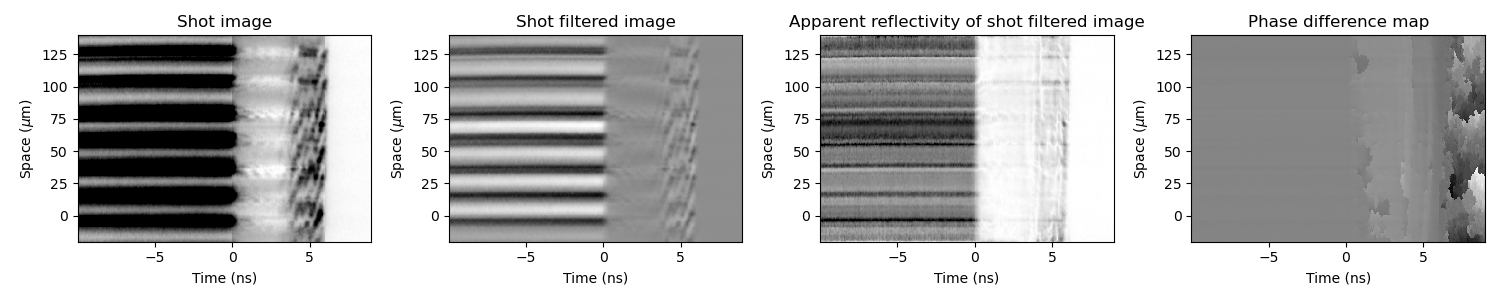

In [31]:
VISAR1_process.Filter()
VISAR2_process.Filter()

Calculate spatially averaged apparent velocity on a second ROI based on phase difference map, apply offset, jumps and corrective index.

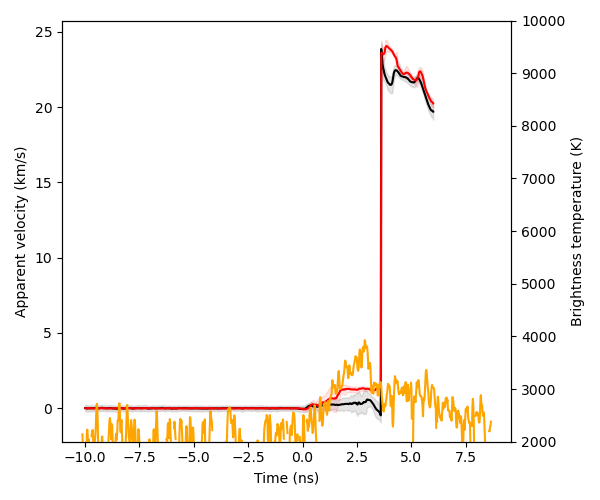

In [32]:
# %matplotlib widget
# First iteration without jump and with offset at 0 to guess offset
[V1_t, V1_v, V1_verr] = VISAR1_process.Velocity(offset=0, tjump_list=[], njump_list=[], corr_index_list=[], vROI=[(40, 100), (-10, 9)])
[V2_t, V2_v, V2_verr] = VISAR2_process.Velocity(offset=0, tjump_list=[], njump_list=[], corr_index_list=[], vROI=[(40, 100), (-10, 9)])
V1_offset = -np.average(V1_v[np.where(V1_t<-1)])
V2_offset = -np.average(V2_v[np.where(V2_t<-1)])
# Second call where parameters can be adjusted
[V1_t, V1_v, V1_verr] = VISAR1_process.Velocity(offset=V1_offset, tjump_list=[3.6, 6.0], njump_list=[4, 0], corr_index_list=[1, 0], vROI=[(40, 100), (-10, 9)])
[V2_t, V2_v, V2_verr] = VISAR2_process.Velocity(offset=V2_offset, tjump_list=[3.6, 6.0], njump_list=[9, 0], corr_index_list=[1, 0], vROI=[(40, 100), (-10, 9)])

# Plot
fig = plt.figure(figsize=(6,5))
ax1=fig.add_subplot(111)
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Apparent velocity (km/s)')
ax1.plot(V1_t, V1_v, 'k-', label='VISAR1')
ax1.fill_between(V1_t, V1_v-V1_verr, V1_v+V1_verr, color='k', alpha=0.1)
ax1.plot(V2_t, V2_v, 'r-', label='VISAR2')
ax1.fill_between(V2_t, V2_v-V2_verr, V2_v+V2_verr, color='r', alpha=0.1)
# ax1.set_ylim(-1, 6)

# SOP
# SOP calibration parameters (if any)
T0 = 20553.963
A = 51837.979
T_B = T0/(np.log(1 + A/(Isop-Isop_shotbkg))) # Brightness temperature
ax2 = ax1.twinx()
# ax2.set_ylabel('Counts (ADU)')
# ax2.set_ylim(10, 70000)
# ax2.semilogy(shot_outputs.SOP.time, Isop-Isop_shotbkg , '-', color='orange')  # counts only
ax2.set_ylabel('Brightness temperature (K)')
ax2.set_ylim(2000, 10000)
ax2.plot(shot_outputs.SOP.time, T_B , '-', color='orange')  # brightness temperature

fig.tight_layout()
plt.show()

Export VISARs

In [13]:
# outdir = path_base + os.sep + 'PROCESSED_DATA'
# VISAR1_process.Export_velocity_trace(outdir, f'run{int(shot_nb)}_V1_vel', visar_nb='1', ext='.txt')
# VISAR2_process.Export_velocity_trace(outdir, f'run{int(shot_nb)}_V2_vel', visar_nb='2', ext='.txt')

Export SOP

In [21]:
# def Export_SOP_trace(fname, time, counts):
#     fi = open(fname, 'w')
#     fi.write('# Time (ns)\tCounts (ADU)\n')
#     for ii in range(0, len(time)):
#         fi.write(f'{time[ii]}\t{counts[ii]}\n')
#     fi.close()

# outdir = path_base + os.sep + 'PROCESSED_DATA'
# # export raw counts
# Export_SOP_trace(outdir + os.sep + f'run{int(shot_nb)}_SOP.txt', shot_outputs.SOP.time, Isop)
# # export background
# Export_SOP_trace(outdir + os.sep + f'run{int(shot_nb)}_SOPbkg.txt', shot_outputs.SOP.time, Isop_shotbkg)

## Impedance matching

In [28]:
# # Load Hugoniot
# from Velocity_analysis import *

# vecUp = np.linspace(0, 10, 10001)

# LiF = LiF()
# Nickel = Nickel()

# # U_app_LiF = 4.0
# # coef_LiF = 1.29
# # Up_LiF = np.around(U_app_LiF/coef_LiF, decimals=3)

# # IM_BK_LiF = impedance_matching(Nickel, LiF, 'Up_2', vecUp, Up_LiF, plot=True) 

# U_app_LiF = 4.4
# coef_LiF = 1.29
# Up_LiF = np.around(U_app_LiF/coef_LiF, decimals=3)
# print(2.67*Up_LiF*LiF.Us_from_Up(Up_LiF))

88.94171021985


## Conditions from mean Us

In [19]:
# from Velocity_analysis import *

# BKapton = BKapton()

# e = 50
# t1 = 0
# t2 = 3.4
# meanUs = e/(t2-t1)
# rho0 = BKapton.rho0

# print(f'Pressure in sample: {BKapton.Up_from_Us(meanUs)*meanUs*rho0:.0f} GPa')
# print(f'Density in sample: {meanUs*rho0/(meanUs - BKapton.Up_from_Us(meanUs)):.2f} g/cm3')


## Conditions from free surface velocity

In [20]:
# from Velocity_analysis import *

# Molybdenum = Molybdenum()

# Ufs = 6.0
# Up = Ufs/2.
# rho0 = Molybdenum.rho0
# Us = Molybdenum.Us_from_Up(Up)

# print(f'Pressure in sample: {Us*Up*rho0:.0f} GPa')
# print(f'Density in sample: {Us*rho0/(Us - Up):.2f} g/cm3')